<a href="https://colab.research.google.com/github/wandalistathea/customer-segmentation/blob/main/Customer%20Segmentation%20(Clustering%20Menggunakan%20K-Means%20%26%20Agglomerative).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
data = pd.read_csv("D:/IT DEL/SEMESTER 5/CERTAN/Proyek CERTAN/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

# Gantilah 'nama_file.csv' dengan path atau URL dataset Anda
dataset = pd.read_csv("D:/IT DEL/SEMESTER 5/CERTAN/Proyek CERTAN/Mall_Customers.csv")

# Hanya akan menggunakan 2 features agar dapat divisualisasikan
# "Annual Income" dan "Spending Score"
X = dataset.iloc[:, 3:5]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
# Ukuran data (kolom, baris)
X.shape

(200, 2)

In [6]:
# Cek data missing
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Ringkasan data
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


## AGGLOMERATIVE CLUSTERING

In [8]:
import scipy.cluster.hierarchy as sch

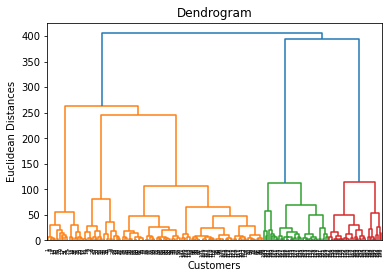

In [9]:
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Memotongnya di garis vertikal yang paling panjang
# Dia tidak berpotongan dengan garis horizontal manapun
# Di horizontalnya, yang memotong paling banyak titik

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")

In [12]:
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

In [13]:
ac.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [14]:
# Cara lain untuk melihat hasil cluster
# y_pred = ac.fit_predict(X)

In [15]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_

In [16]:
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### Visualisasi Hasil Clustering (Agglomerative)

C:\Users\MSI MARKUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frekuensi')

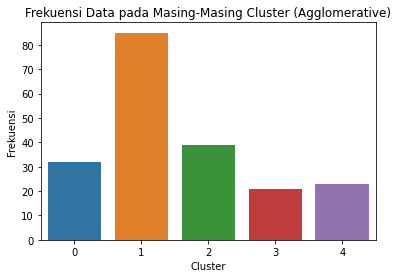

In [17]:
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values

sns.barplot(cluster_x1, cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [18]:
#sns.pairplot(hasil_ac, hue = "cluster")

In [19]:
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [20]:
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 1]

ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 1]

ann_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 0]
spend_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 1]

ann_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 0]
spend_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 1]

ann_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 0]
spend_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 1]

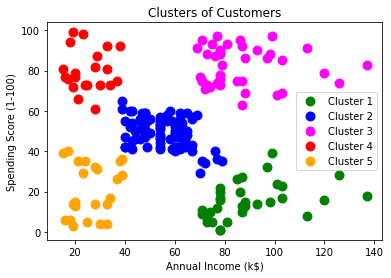

In [21]:
# VISUALISASI HASIL CLUSTERING (AGGLOMERATIVE)

plt.scatter(ann_ac0, spend_ac0, s = 80, c = "green", label = "Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s = 80, c = "blue", label = "Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s = 80, c = "magenta", label = "Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s = 80, c = "orange", label = "Cluster 5")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [22]:
# Memasukkan kembali "Customer ID"-nya
hasil_ac["CustomerID"] = dataset["CustomerID"]
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,15,39,4,1
1,15,81,3,2
2,16,6,4,3
3,16,77,3,4
4,17,40,4,5


### Kesimpulan (Agglomerative)

1. Cluster 1 -> Annual Income TINGGI, Spending Score RENDAH
2. Cluster 2 -> Annual Income SEDANG, Spending Score SEDANG
3. Cluster 3 -> Annual Income TINGGI, Spending Score TINGGI
4. Cluster 4 -> Annual Income RENDAH, Spending Score TINGGI
5. Cluster 5 -> Annual Income RENDAH, Spending Score RENDAH